# Escaping Earth with Julia

<i>Copyright 2016, Pedro Belin Castellucci,

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.</i>

Gravity is a familiar concept. Every object near the Earth is subject to Earth gravitational force, which attract the object to its center. This gravitation force is associated with gravitational acceleration $g$. Near the Earth surface $g \approx 9.8\ m/s²$. However, assuming the acceleration is constant may be an unrealistic for some applications. In fact, different parameters affect $g$ such as latitude and altitude. In this Notebook, we will play a little bit with the dependence of the gravitational acceleration and altitude. Our goal is not to do rigorous Math or Physics, but to use the context to learn some Julia programming basics (for some Math and Physics, the reader is refered to [this link]([https://en.wikipedia.org/wiki/Gravity_of_Earth])).

Instead of assuming a constant acceleration, a more realistic model for the gravity acceleration $g_e$ is:

$$g_e = g_0 \Big(\frac{r_e}{r_e + h}\Big)^2,$$

in which $g_0$ is called the standard acceleration of gravity and is defined as $g_0 = 9.80665\ m/s^2$. The actual acceleration is $g_e$ and depends on $r_e$ and $h$, the average radius of Earth and the height (above sea level) of the point from which we are computing $g_e$, respectively.
 
## Defining variables


Let us define Julia variables to keep $g_0 = 9.788\ m/s^2$ (Rio de Janeiro) value and the average radius of earth $r_e = 6 378 000\ m$.

In [1]:
g0 = 9.80665  # g in Rio de Janeiro in m/s²
re = 6378000  # Average radius of Earth in meters.

6378000

Note that we do not need to declare the type of our variables. However they do have a type, which we can check with <i>typeof</i>.

In [2]:
typeof(g0), typeof(re), typeof("Earth")

(Float64,Int64,String)

## Defining a function

Next, we define a function called <i>localGravity</i> to compute $g_e$ as function of $g_0$, $r_e$ and $h$.

In [3]:
function localGravity(g0, re, h)
    g0*(re/(re + h))^2  # This is the return of the function
end

localGravity (generic function with 1 method)

Note that the return of a function is the statement in its last line. Another way of defining the same function is using a one line definition.

In [4]:
localGravity(g0, re, h) = g0*(re/(re + h))^2

localGravity (generic function with 1 method)

We get a warning because we are redefining the <i>localGravity</i> function.

## While loop

We will use a while-loop to simulate the position of our particle over time. As a first example, let us just see how to print out the time instants from 0 to 4s with a time step of $\Delta t=0.5s$.

In [5]:
deltat = 0.5
t = 0
T = 4
while t <= T
    println(t)
    t += deltat
end

0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0


Using a while-loop, we are ready to simulate a vertical launch of a particle. We will assume that the variation of position and velocity of our particle is given by:

$$h_k = h_{k-1} + v_{k-1} \Delta t,$$

$$v_k = v_{k-1} + g_e^k \Delta t,$$

in which $h_k$ and $v_k$ are the height and velocity at time $k$, respectively. $g_e^k$ is given by the <i>localGravity</i> function and $\Delta t$ is the discrete time step we choose for our simulation. As a first example, we will consider $(h_0, v_0) = (0, 10)$ and simulate 2.2 seconds with $\Delta t = 0.1.$ 

In [7]:
# Initial conditions:
v0 = 10.0
h0 = 0.0
time = 0.0

# Simulation time:
endOfSimulation = 2.2

# Time step:
deltat = 0.1

while time <= endOfSimulation
    # Updating height and velocity:
    h0, v0 = h0 + v0*deltat, v0 - localGravity(g0, re, h0)*deltat
    
    # Printing a formatted output:
    toPrint = @sprintf("t = %.2f \t h = %.2f", time, h0)
    println(toPrint)
    
    # Incrementing time:
    time += deltat
end

t = 0.00 	 h = 1.00
t = 0.10 	 h = 1.90
t = 0.20 	 h = 2.71
t = 0.30 	 h = 3.41
t = 0.40 	 h = 4.02
t = 0.50 	 h = 4.53
t = 0.60 	 h = 4.94
t = 0.70 	 h = 5.25
t = 0.80 	 h = 5.47
t = 0.90 	 h = 5.59
t = 1.00 	 h = 5.61
t = 1.10 	 h = 5.53
t = 1.20 	 h = 5.35
t = 1.30 	 h = 5.08
t = 1.40 	 h = 4.70
t = 1.50 	 h = 4.23
t = 1.60 	 h = 3.66
t = 1.70 	 h = 3.00
t = 1.80 	 h = 2.23
t = 1.90 	 h = 1.37
t = 2.00 	 h = 0.41
t = 2.10 	 h = -0.65


We printed out the height of the particle as time evolves. To make it a little prettier, we used the macro @sprintf. We are not going to discuss macros here, but <b>superficially</b> they are like functions. 

However, we can do a better job with the output. Julia has different plotting libraries, we are going to use [Plots](https://juliaplots.github.io) to plot the trajectory of the particle over time. To install it you can use the following: 

In [7]:
Pkg.add("Plots")

INFO: Nothing to be done


## Ranges, loops and conditions

Before using the Plots library, we will take a look at ranges, for-loops and conditions. Ranges are objects that act like arrays in most cases but are implemented in an efficient way. Let us create a range.

In [8]:
myRange = 1:10

1:10

We can check the type of the object.

In [9]:
typeof(myRange)

UnitRange{Int64}

To check the elements inside the range object, we can use <i>collect</i>.

In [10]:
collect(myRange)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

Note that the syntax <i>a:b</i> creates a collection of elements in the interval $[a, b]$. By default, each element is separated by a unit but we can also specify the step of the range to be created.

In [11]:
collect(1:0.1:2)

11-element Array{Float64,1}:
 1.0
 1.1
 1.2
 1.3
 1.4
 1.5
 1.6
 1.7
 1.8
 1.9
 2.0

<b>Exercise:</b> Use ranges to create the following arrays:
1. Even numbers in the interval [10, 40];
2. Odd numbers in the interval [5, 15];
3. [-10.5, -9.5, -8.5, -7.5];
4. An empty array;

For-loops are suitable to iterate over range objects.

In [12]:
for i in myRange
    println(i) 
end

1
2
3
4
5
6
7
8
9
10


In Julia, true and false are Bool types.

In [7]:
5 == 2, 5 >= 2, 1 < 2 < 3, typeof(5 == 2)

(false,true,true,Bool)

The Bool types can be used in conditional statements like the one that follows.

In [10]:
a, b = 5, 2
if a == b
    println("The numbers are equal.")
else
    println("The numbers are different.")
end

The numbers are different.


<b>Exercise:</b> Write an algorithm to tell which integer numbers between 1 and 10 are even and odd.

Now, we are ready to plot the trajectory of the particle. We will use an array to keep track of the positions of the particle over time. To append elements to an array we can use the <i>append!</i> method.

In [8]:
using Plots  # Importing the library we will use.
# plotly()  # The backend we are using

h0 = 0.0  # Initial height.
v0 = 10.0  # Initial velocity.

endOfSimulation = 2.2  # We will stop the simulation at 2.2 s.

posList = []  # The array to store the positions.

deltat = 0.1  # Time step

for i = 0:deltat:endOfSimulation
    
    append!(posList, h0)  # Storing the position in posList array.
    
    # Updating position and velocity:
    h0, v0 = h0 + v0*deltat, v0 - localGravity(g0, re, h0)*deltat
    
    if h0 < 0  
        # If the particle returns to the ground we stop the simulation:
        endOfSimulation = i
        break
    end
    
end

# To plot the results we use the plot function from Plots:
plot(0:deltat:endOfSimulation, posList, xlabel="Time", ylabel="Height", w=3, label="")

LoadError: LoadError: ArgumentError: Module Plots not found in current path.
Run `Pkg.add("Plots")` to install the Plots package.
while loading In[8], in expression starting on line 1

The objects reaches a height of nearly $5.5\ m$ when launched with a velocity of $10\ m/s$. 


## Putting it all together

There is the concept of Escape Velocity, which is the velocity something needs to be launched from a planet surface to escape its gravitational influence (and getting lost in space forever). So, what is the escape velocity of our model? We can try to estimate it, empirically. First, let us convert our simulation code into a function.

In [15]:
function simul(h0, v0, endOfSimulation)

    posList = []  # The array to store the positions.

    Δt = 0.1  # Time step

    for i = 0:deltat:endOfSimulation

        append!(posList, h0)  # Storing the position in posList array.

        # Updating position and velocity:
        h0, v0 = h0 + v0*deltat, v0 - localGravity(g0, re, h0)*deltat

        if h0 < 0  
            # If the particle returns to the ground we stop the simulation
            endOfSimulation = i
            break
        end
    end
    0:deltat:endOfSimulation, posList  # This is the return of our function
    
end

simul (generic function with 1 method)

Now, we plot the trajectory of the particle for different initial velocities.


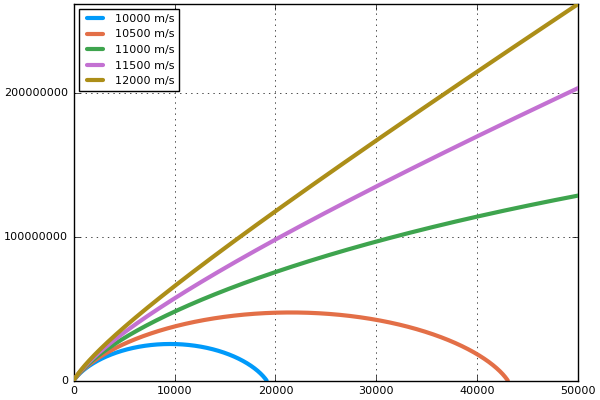

In [16]:
fig = plot()
for v0 in 10000:500:12000
    time, toPlot = simul(0, v0, 50000)
    plot!(time, toPlot, label=string(v0) * " m/s", w=3)
end
fig

We can see from the plot that the escape velocity is bigger than 10500 $m/s$. The actual Earth escape velocity is estimated to be 11200 $m/s$.  You can play with the values to see if you can get close to the actual value from our model.

In this Notebook, we explored some basic features of Julia, namely, variables and function declarations, while and for-loops and used the PyPlot library to visualize some output.